# Mortalidad en accidentes de tránsito

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Leemos el conjunto de datos.

In [2]:
df = pd.read_csv("dataset/seatbelts.csv") 

Visualizamos nuestro conjunto de datos.

In [3]:
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0
...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1
188,122,1444,643,429,20195,0.114093,7,1
189,120,1575,641,408,19928,0.116466,7,1
190,137,1737,711,490,18564,0.116026,4,1


In [4]:
df.describe()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,122.802083,1670.307292,837.218750,401.208333,14993.604167,0.103624,9.057292,0.119792
std,25.379886,289.610958,175.098967,83.102210,2938.049207,0.012176,3.636903,0.325567
min,60.000000,1057.000000,426.000000,224.000000,7685.000000,0.081179,2.000000,0.000000
25%,104.750000,1461.750000,715.500000,344.750000,12685.000000,0.092577,6.000000,0.000000
50%,118.500000,1631.000000,828.500000,401.500000,14987.000000,0.104477,8.000000,0.000000
75%,138.000000,1850.750000,950.750000,456.250000,17202.500000,0.114056,12.000000,0.000000
max,198.000000,2654.000000,1299.000000,646.000000,21626.000000,0.133027,17.000000,1.000000


In [5]:
df.shape

(192, 8)

Como la tarea principal del conjunto de datos se centrará en el antes y el después de la introducción de la legislación sobre el cinturón de seguridad, es conveniente dividir el conjunto de datos en dos: 
* uno de antes de la legislación (etiquetado como law=0)
* y uno de después de la legislación (etiquetado como law=1)

Así pues, primero cuántos datos hay en cada uno de estos conjuntos.

In [6]:
print(df.groupby('law').size())

law
0    169
1     23
dtype: int64


<AxesSubplot:>

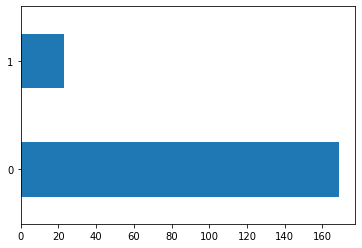

In [7]:
df['law'].value_counts().plot(kind='barh')

Y luego separamos los datos en dos dataframes distintos.

In [8]:
sinley = df.loc[df['law'] == 0] # Con un tamaño de 169 entradas.

In [9]:
sinley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0


In [10]:
conley = df.loc[df['law'] == 1] # Con un tamaño de 23 entradas.

In [11]:
conley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
169,95,1057,426,300,15511,0.113657,3,1
170,100,1218,475,318,18308,0.113144,2,1
171,89,1168,556,391,17793,0.118496,6,1
172,82,1236,559,398,19205,0.117969,3,1
173,89,1076,483,337,19162,0.117687,7,1


Ahora, veamos la proporción de conductores fallecidos antes y después de que usar cinturón de seguridad fuera ley. 

* Pasajeros al frente y detrás.

In [12]:
(sinley['front'].sum()+sinley['rear'].sum())/sinley['drivers'].sum() 

0.7415363417154668

In [13]:
(conley['rear'].sum()+conley['rear'].sum())/conley['drivers'].sum() 

0.6169939800651337

* Pasajeros al frente

In [14]:
sinley['front'].sum()/sinley['drivers'].sum()

0.5084877712710989

In [15]:
conley['front'].sum()/conley['drivers'].sum()

0.43198789433862955

* Pasajeros detrás

In [16]:
sinley['rear'].sum()/sinley['drivers'].sum()

0.2330485704443679

In [17]:
conley['rear'].sum()/conley['drivers'].sum()

0.30849699003256686

Por lo tanto, podemos concluir que afectivamente disminuyó el número de muertes en accidentes gracias a la legislación que se aprobó.

Podemos notar además que la probabilidad de morir siendo pasajero detrás aumentó con la legislación.

Por otro lado, para calcular la correlación y la regresión lineal entre dos factores se utilizó el conjunto de datos **sinley** (pues tiene la mayor cantidad de entradas), esto para que los datos no estuvieran sesgados por los diferentes factores.

### Correlaciones

* Kilometraje vs Precio del Petróleo

In [18]:
sinley['kms'].corr(sinley['PetrolPrice'])

0.2454145513640142

<function matplotlib.pyplot.show(close=None, block=None)>

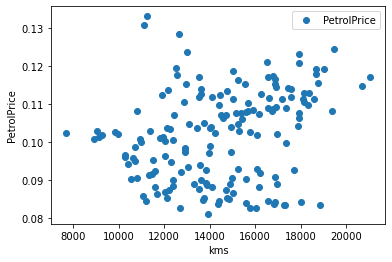

In [19]:
sinley.plot(x='kms', y='PetrolPrice',style='o')
plt.xlabel('kms')
plt.ylabel('PetrolPrice')
plt.show

Donde, a pesar de esperar que la correlación fuera negativa (pues a 
        mayor precio de la gasolina, menos distancia se recorrería); se obtuvo 
        un valor positivo.

* Pasajeros al frente y números de fallecidos

In [20]:
sinley['front'].corr(sinley['DriversKilled'])

0.680838498476919

<function matplotlib.pyplot.show(close=None, block=None)>

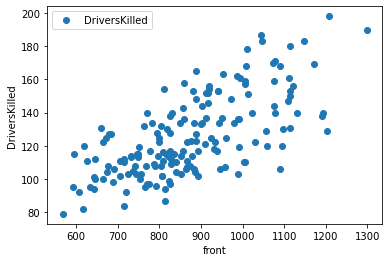

In [21]:
sinley.plot(x='front', y='DriversKilled',style='o')
plt.xlabel('front')
plt.ylabel('DriversKilled')
plt.show

* Pasajeros en los asientos traseros vs Números de fallecidos

In [22]:
sinley['rear'].corr(sinley['DriversKilled'])

0.39819152226684645

<function matplotlib.pyplot.show(close=None, block=None)>

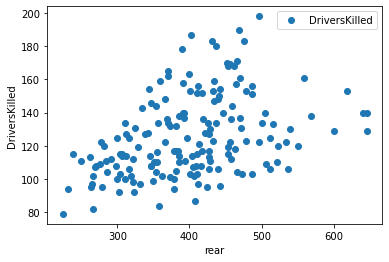

In [23]:
sinley.plot(x='rear', y='DriversKilled',style='o')
plt.xlabel('rear')
plt.ylabel('DriversKilled')
plt.show

* Kilometraje vs Números de fallecidos.

In [24]:
sinley['kms'].corr(sinley['DriversKilled'])

-0.1914246520972008

<function matplotlib.pyplot.show(close=None, block=None)>

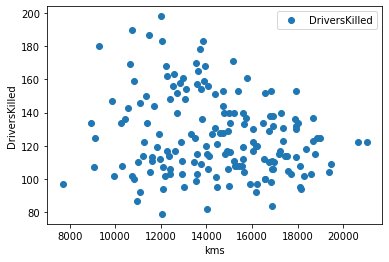

In [25]:
sinley.plot(x='kms', y='DriversKilled',style='o')
plt.xlabel('kms')
plt.ylabel('DriversKilled')
plt.show

* Precio de la gasolina vs Números de fallecidos.

In [26]:
sinley['PetrolPrice'].corr(sinley['DriversKilled'])

-0.3120898696115776

<function matplotlib.pyplot.show(close=None, block=None)>

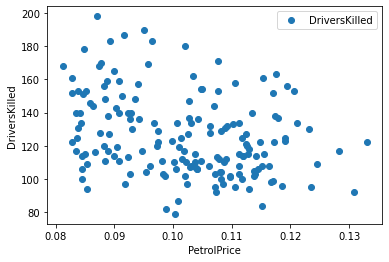

In [27]:
sinley.plot(x='PetrolPrice', y='DriversKilled',style='o')
plt.xlabel('PetrolPrice')
plt.ylabel('DriversKilled')
plt.show

* Conductores de furgonetas vs Números de fallecidos

In [28]:
sinley['VanKilled'].corr(sinley['DriversKilled'])

0.3382807387324673

<function matplotlib.pyplot.show(close=None, block=None)>

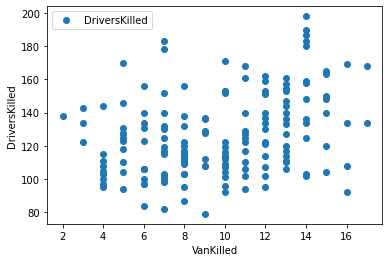

In [29]:
sinley.plot(x='VanKilled', y='DriversKilled',style='o')
plt.xlabel('VanKilled')
plt.ylabel('DriversKilled')
plt.show

Notemos que las variables independientes parecen ser Kms, PetrolPrice, Front y Rear, mientras que la variable dependiente será DriversKilled.

### Modelo

* Usamos regresión lineal múltiple.

In [30]:
X = sinley[['front', 'rear', 'kms', 'PetrolPrice']] 
y = sinley['DriversKilled']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos el modelo y lo entrenamos.

In [32]:
# Creamos el modelo.
linearegression = LinearRegression()
# Entrenamos nuestro modelo.
linearegression.fit(X_train, y_train)

LinearRegression()

In [33]:
coef_df = pd.DataFrame(linearegression .coef_, X.columns, columns=['Coefficient'])

In [34]:
coef_df

,Coefficient
front,0.170932
rear,-0.107635
kms,0.000775
PetrolPrice,117.617962


Esto significa que, 
 * Cuando DriverKilled incrementa una unidad, entonces front incrementa $0.170932$ unidades.

 * Cuando DriverKilled incrementa una unidad, entonces rear disminuye $-0.107635$ unidades.

 * Cuando DriverKilled incrementa una unidad, entonces kms incrementa $0.000775$ unidades.

 * Cuando DriverKilled incrementa una unidad, entonces PetrolPrice incrementa $117.617962$ unidades.

In [35]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', linearegression .coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', linearegression .intercept_)

Coefficients: 
 [ 1.70931674e-01 -1.07634662e-01  7.75241740e-04  1.17617962e+02]
Independent term: 
 -3.1781268153861646


### Predicciones y resultados

In [36]:
# Realizamos predicciones usando el conjunto de prueba.
y_pred = linearegression.predict(X_test)

In [37]:
linearegression.score(X, y)

0.5037399894622504

In [38]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [39]:
dfp

,Actual,Predicted
138,102,118.157880
30,130,149.698408
119,178,148.096824
29,148,136.896331
143,137,134.645197
162,122,121.154351
165,137,136.965789
51,131,157.444694
105,140,119.056342
60,113,113.445734


y observamos la presión de nuestro modelo

In [40]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 15.09
Mean squared error: 327.90
Root Mean Squared Error: 18.11
Variance score: 0.36


A partir de esto, podemos concluir que el modelo realiza predicciones 
    considerablemente buenas. 